# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

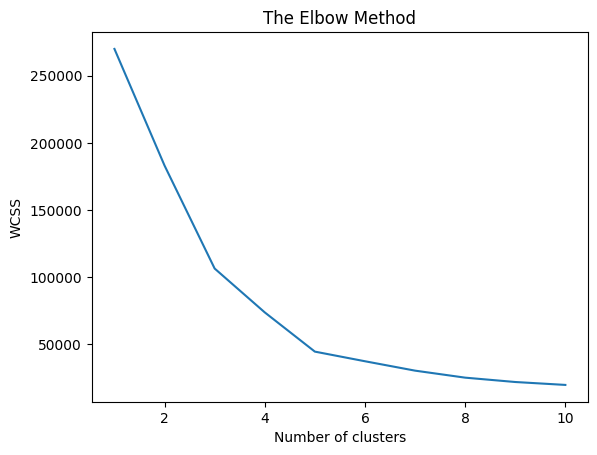

In [6]:
from sklearn.cluster import KMeans #importing
#creating lots of clusters using loop
wcss = [] #different wcss value for different cluster
for i in range(1,11): #choosing 10 cluster
    #let's create our KMeans object now
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=7) #n_cluster means number of clusters and appointig i every time (increasig clusters), init set not to go in random initialization, choose some random state as well
    #run the algo
    kmeans.fit(X) #here only X is the feature
    #wcss value
    wcss.append(kmeans.inertia_) #inertia gets the wcss value for us

#plotting the graph for different wcss values
plt.plot(range(1,11),wcss) #in x we will have 1 to 10 and in y, we will have wcss values
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()










Here from graph we can see at number 5, the wcss decreases slowly. so, Optimal number of cluster should be 5

## Training the K-Means model on the dataset

In [10]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=7)
#kmeans.fit(X)
#values of depending varaible will be here and assigned 1,2,3,4,5
#kmeans.fit_predict(X)
#fit_predict fits and returns the depending variable
y_kmeans=kmeans.fit_predict(X) #Depending variable done




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(y_kmeans)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


from the data [1 3 1 3.....
Here customerID 0001 belongs to 2nd (index 1) cluster
customerID 0002 belongs to 4th cluster
customerID 0003 belongs to 2nd cluster
customerID 0004 belongs to 4th cluster


## Visualising the clusters

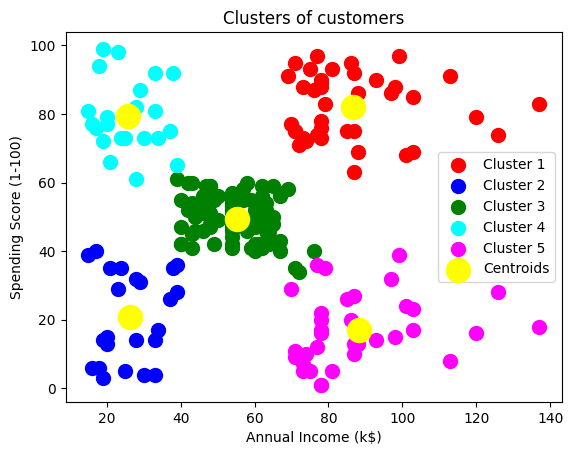

In [14]:
#using scatter function for 5 clusters
#We are creating plots for cluster 0,1,2,3,4 (as 5 clusters)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c='red',label = 'Cluster 1') #X coordinates and Y coordinates, color, lebel,size set to 100 to increase size of points
#in x axis we will have Annnual Income and in y, we have Spennding score
# For x coordinates , Choose column Annual income and rows which belongs to cluster 1
#here y_kmeans==0 will select people who belongs to cluster 1 which means row and column is set to 0 as in our feature X matrix, Annnual income is at column 0
#So, x coordinate= X[y_kmeans==0,0]
# For y axis, we will have second column of X feature and people who belogs to cluster 1
#So, y coordinate= X[y_kmeans==0,1]

#Now follow the process for other clusters
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#Let's take the centers now
#cluster_centers is a 2D array which has centers for all
#so, for x axis take all row and the first column
#cluster_centers_[:,0]
#for y axis take all row and the second column
#cluster_centers_[:,1]
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

#Now the title and labels
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


So, we have Annual Inncome on x axis and Spendinng Score in y axis with clusters and centroids